In [1]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import re, string, snowballstemmer
import contractions

In [2]:
ds = load_dataset("sh0416/ag_news")

In [3]:
ds_train = ds['train']
ds_test = ds['test']

In [4]:
type(ds_train), type(ds_test)

(datasets.arrow_dataset.Dataset, datasets.arrow_dataset.Dataset)

In [5]:
df_train = ds_train.to_pandas()
df_test = ds_test.to_pandas()

In [6]:
type(df_train), type(df_test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [7]:
df_train.shape, df_test.shape

((120000, 3), (7600, 3))

In [8]:
df = pd.concat([df_train, df_test])

In [9]:
df.shape

(127600, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   label        127600 non-null  int64 
 1   title        127600 non-null  object
 2   description  127600 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.9+ MB


In [11]:
df.head()

,label,title,description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [12]:
df.isnull().sum()

label          0
title          0
description    0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.sample(5)

,label,title,description
3981,3,Google Shares Begin Trading on Nasdaq,"Shortly before noon today, Google Inc. stock b..."
43900,3,"#39;Soft patch #39; not so soft, as US econom...",WASHINGTON : The US economy #39;s quot;soft p...
5223,1,Three Indicted in Raising Funds for Hamas (AP),AP - A look at the three men charged with fina...
40670,2,UNITED #39;S PROFITS FALL,Manchester United have announced a fall in pre...
59602,4,Dell launches Axim X50 and X50v,Dell has upgraded its X30 with the X50 range o...


In [17]:
df = df.drop('title', axis = 1)

In [18]:
df.sample(5)

,label,description
101267,1,Hamas Thursday denied European Union Foreign P...
29098,2,AP - A University of South Florida women's bas...
92826,3,Wal-Mart (NYSE: WMT) turned in a decent quarte...
91496,1,"ABIDJAN, Ivory Coast (CP) - With final calls f..."
25257,1,ROME : Italian Foreign Minister Franco Frattin...


In [19]:
X = df['description']
y = df['label']

In [20]:
X.shape, y.shape

((127600,), (127600,))

In [21]:
import matplotlib.pyplot as plt

In [22]:
y_labels= ['World', 'Sports', 'Business', 'Sci/Tech']
bar_colors=['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

Text(0.5, 1.0, 'News Categories by No. of samples')

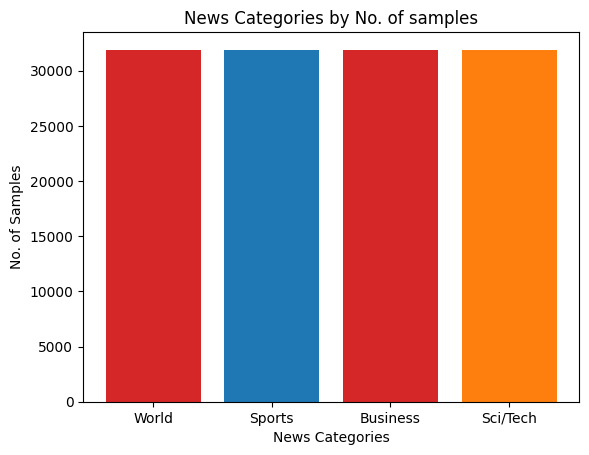

In [23]:
plt.bar(y_labels, y.value_counts().sort_index(), color = bar_colors)
plt.ylabel('No. of Samples')
plt.xlabel('News Categories')
plt.title('News Categories by No. of samples')

In [24]:
PUNCTUATION_TRANSLATOR = str.maketrans('','',string.punctuation)

In [25]:
def normalize_document(document):
    document = document.lower()
    document = contractions.fix(document)
    document = document.translate(PUNCTUATION_TRANSLATOR)
    document = " ".join(document.split())
    return document

In [26]:
X = X.apply(normalize_document)

In [27]:
X.head()

0    reuters shortsellers wall streets dwindlingban...
1    reuters private investment firm carlyle groupw...
2    reuters soaring crude prices plus worriesabout...
3    reuters authorities have halted oil exportflow...
4    afp tearaway world oil prices toppling records...
Name: description, dtype: object

In [28]:
y.head()

0    3
1    3
2    3
3    3
4    3
Name: label, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
normalized_df = pd.DataFrame({'X':X, 'y': y})

In [31]:
normalized_df.head()

,X,y
0,reuters shortsellers wall streets dwindlingban...,3
1,reuters private investment firm carlyle groupw...,3
2,reuters soaring crude prices plus worriesabout...,3
3,reuters authorities have halted oil exportflow...,3
4,afp tearaway world oil prices toppling records...,3


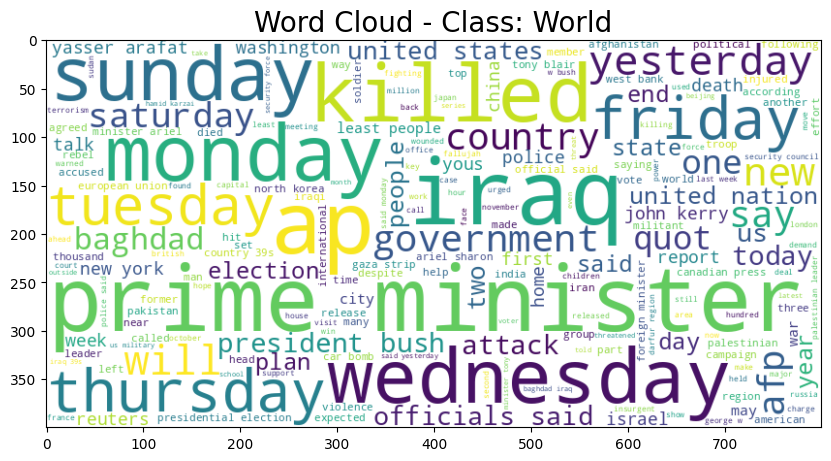

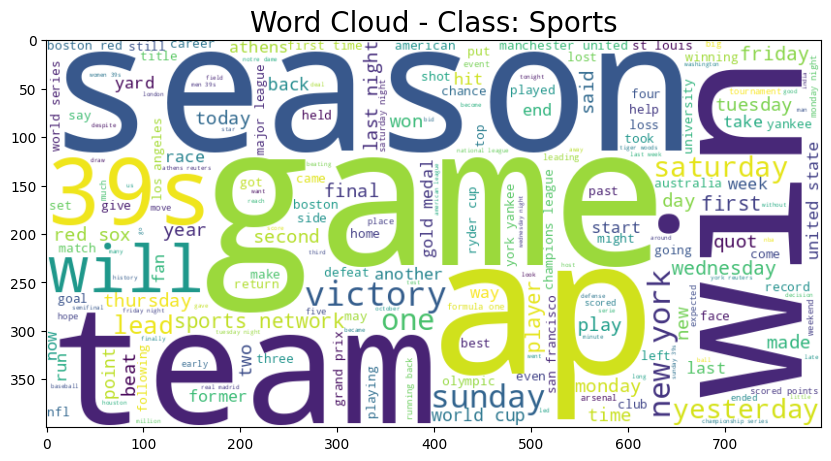

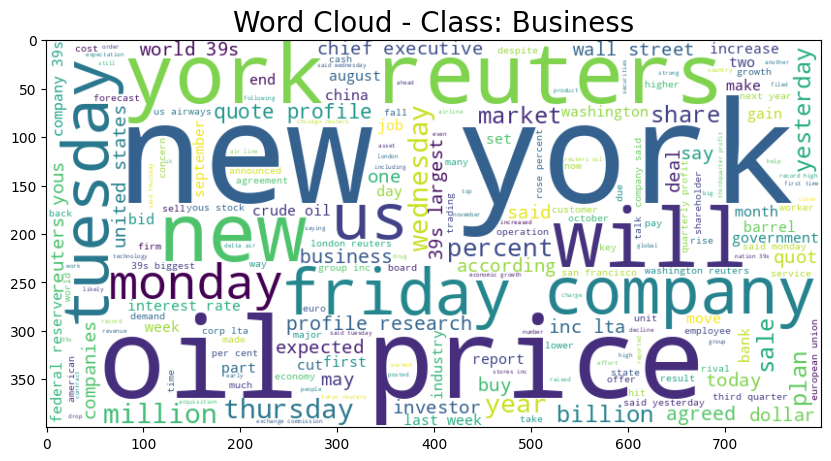

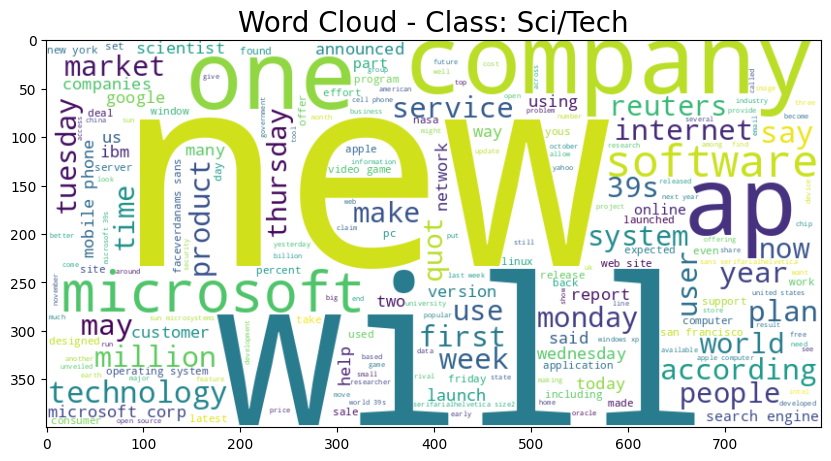

In [32]:
from wordcloud import WordCloud, STOPWORDS

class_names = ['World', 'Sports', 'Business', 'Sci/Tech']
classes = sorted(normalized_df['y'].unique())

for category in classes:
    text_data = " ".join(normalized_df[normalized_df['y'] == category]['X'].astype(str))
        
    wc = WordCloud(
        width=800,
        height= 400,
        background_color='white',
        stopwords=set(STOPWORDS)
    ).generate(text_data)

    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    label_idx = int(category)-1
    plt.title(f'Word Cloud - Class: {class_names[label_idx]}', fontsize=20)

In [ ]:
# train, temp = train_test_split(normalized_df, test_size=0.3, random_state=42, stratify=df['y']) --------- Attempt 1 : to Split train and temp (To further split to val and test)
train, temp = train_test_split(normalized_df, test_size=0.3, random_state=42, stratify=normalized_df['y'])

In [33]:
train.shape, temp.shape

((89320, 2), (38280, 2))

In [34]:
# val, test = train_test_split(train, test_size=0.5, random_state=42, stratify=train['y']) -------- Attempt 1 : to split val and test -> wrong value passed to split
val, test = train_test_split(temp, test_size=0.5, random_state=42, stratify=temp['y'])

In [35]:
train.shape, val.shape, test.shape

((89320, 2), (19140, 2), (19140, 2))

Text(0.5, 1.0, 'Train, Val & Test Split by No. of samples')

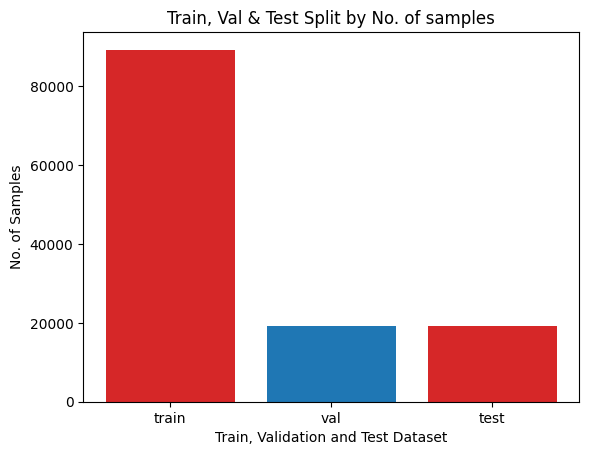

In [36]:
plt.bar(['train', 'val','test'], [train.shape[0], val.shape[0], test.shape[0] ], color = bar_colors)
plt.ylabel('No. of Samples')
plt.xlabel('Train, Validation and Test Dataset')
plt.title('Train, Val & Test Split by No. of samples')

Text(0.5, 1.0, 'News Categories by No. of samples')

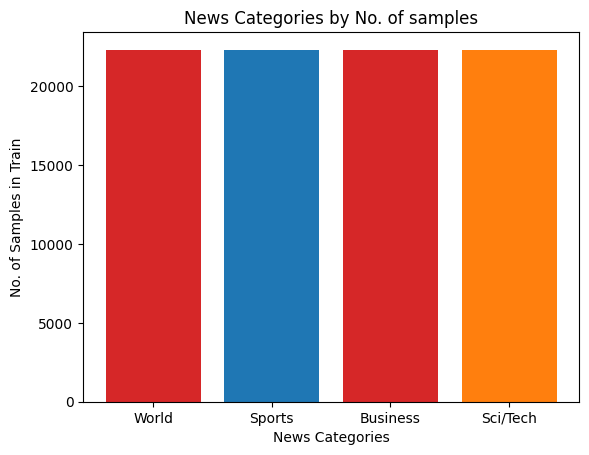

In [37]:
plt.bar(y_labels, train['y'].value_counts().sort_index(), color = bar_colors)
plt.ylabel('No. of Samples in Train')
plt.xlabel('News Categories')
plt.title('News Categories by No. of samples')

In [38]:
train.to_csv('train_data.csv', index=False)
val.to_csv('val_data.csv', index=False)
test.to_csv('test_data.csv', index=False)